In [1]:
import pandas as pd

df = pd.read_excel(
    "../data/Online Retail Data Set.xlsx",
    engine="openpyxl"
)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
df.shape


(541909, 8)

In [4]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]


In [5]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]


In [6]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]


In [7]:
df[["Quantity", "UnitPrice", "Revenue"]].head()


,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [9]:
df_2011 = df[df["InvoiceDate"].dt.year == 2011]


In [10]:
df_2011["InvoiceDate"].dt.year.unique()


array([2011], dtype=int32)

In [11]:
monthly_revenue = (
    df_2011
    .groupby(df_2011["InvoiceDate"].dt.to_period("M"))["Revenue"]
    .sum()
    .reset_index()
)

monthly_revenue["InvoiceDate"] = monthly_revenue["InvoiceDate"].dt.to_timestamp()
monthly_revenue


,InvoiceDate,Revenue
0,2011-01-01,691364.560
1,2011-02-01,523631.890
2,2011-03-01,717639.360
3,2011-04-01,537808.621
4,2011-05-01,770536.020
5,2011-06-01,761739.900
6,2011-07-01,719221.191
7,2011-08-01,759138.380
8,2011-09-01,1058590.172
9,2011-10-01,1154979.300


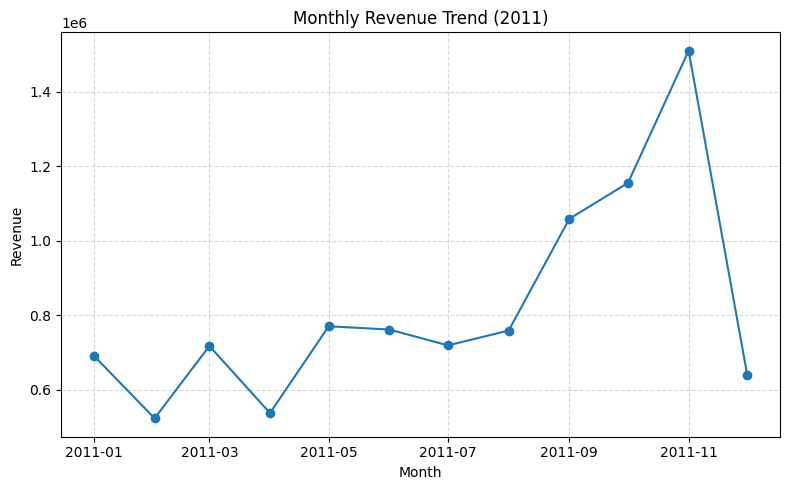

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(
    monthly_revenue["InvoiceDate"],
    monthly_revenue["Revenue"],
    marker="o"
)

plt.title("Monthly Revenue Trend (2011)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [13]:
df_2011.to_csv("../data/online_retail_2011_clean.csv", index=False)
